In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
sns.set_style('whitegrid')

In [129]:
df = pd.read_csv('transfusion.txt')

<strong>WHERE:</strong>  
R (Recency - months since last donation),  
F (Frequency - total number of donation),  
M (Monetary - total blood donated in c.c.),  
T (Time - months since first donation), and  
a binary variable representing whether he/she donated blood in March 2007 (1   
stand for donating blood; 0 stands for not donating blood).  

In [130]:
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


Let's check out what the describe and correlation method can give us about the data we have

In [131]:
df.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [132]:
df.corr()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
Recency (months),1.000000,-0.182745,-0.182745,0.160618,-0.279869
Frequency (times),-0.182745,1.000000,1.000000,0.634940,0.218633
Monetary (c.c. blood),-0.182745,1.000000,1.000000,0.634940,0.218633
Time (months),0.160618,0.634940,0.634940,1.000000,-0.035854
whether he/she donated blood in March 2007,-0.279869,0.218633,0.218633,-0.035854,1.000000


C:\Users\vasil\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


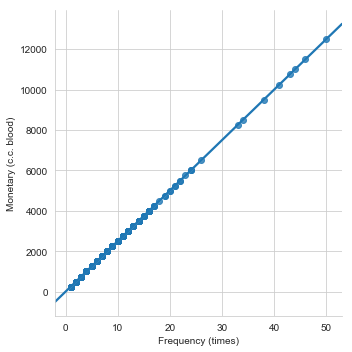

In [133]:
sns.lmplot(data=df,x='Frequency (times)', y='Monetary (c.c. blood)') # corr = 1.0

In [134]:
df[df['Frequency (times)'] == 1]['Monetary (c.c. blood)'].unique()

array([250], dtype=int64)

Couple of interesting points I should take note off:  
- (mean of Frequency):  
    I cannot just say that most people donate blood around 5 times because I have a very large standard deviation and clearly as seen later on in the analysis this is due to outliers of subjects that have donated blood 30 or more times    
    *Same thing applies to the other means*
- Frequency and Monetary (c.c. blood) are directly correlated since each time you donate blood the clinic gets 250c.c.

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
Recency (months)                              748 non-null int64
Frequency (times)                             748 non-null int64
Monetary (c.c. blood)                         748 non-null int64
Time (months)                                 748 non-null int64
whether he/she donated blood in March 2007    748 non-null int64
dtypes: int64(5)
memory usage: 29.3 KB


<strong>Let's do some exploratory data analysis to get a better idea of the data:</strong>

First lets check out the distribution of how long ago people started donating blood to this clinic

In [136]:
mini = df['Time (months)'].min()
maxi = df['Time (months)'].max()

C:\Users\vasil\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


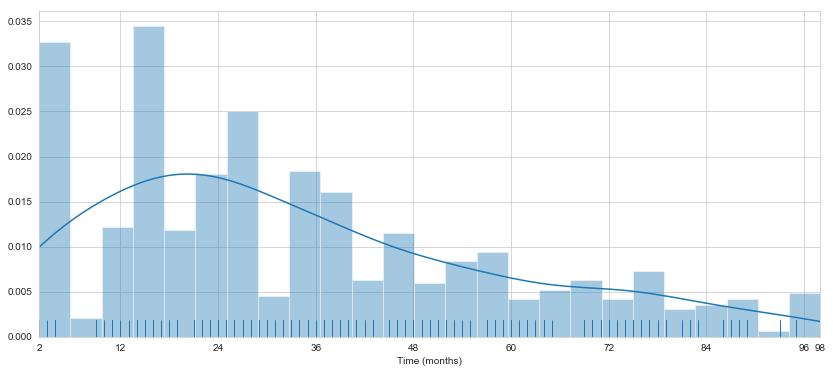

In [137]:
plt.figure(figsize=(14,6))
plt.xlim(mini,maxi) ##no data of people donating in the last month sto I start from 2 months ago
plt.xticks([mini,12,24,36,48,60,72,84,96,maxi])
sns.distplot(df['Time (months)'],bins=25,rug=True)

From this distribution we can see that most of people started donating blood in the past 3 years (36 months)

Let's now investigate a possible relation between Frequency of blood donations and Time since first donation

In [138]:
df['Frequency (times)'].value_counts().sort_values(ascending=False).head(10) ##most people donated once or twice

1     158
2     112
3      87
4      62
5      62
6      52
7      43
8      31
9      24
11     22
Name: Frequency (times), dtype: int64

C:\Users\vasil\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


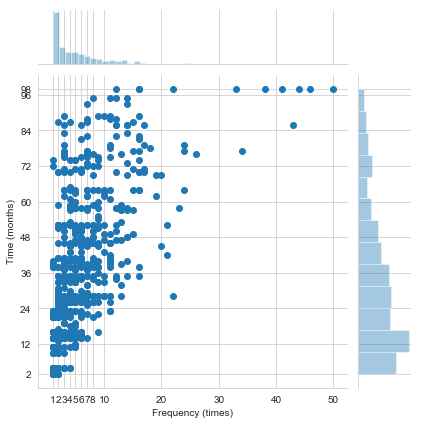

In [139]:
j = sns.jointplot(x='Frequency (times)',y='Time (months)',data=df)
j.ax_joint.set_xticks([1,2,3,4,5,6,7,8,10,20,30,40,50])
j.ax_joint.set_yticks([mini,12,24,36,48,60,72,84,96,maxi])

Let's answer the question of how many people of the once that have only donated once just started doing so in the last couple of years

In [140]:
df[(df['Frequency (times)'] == 1) & (df['Time (months)'] < 25)].count()

Recency (months)                              152
Frequency (times)                             152
Monetary (c.c. blood)                         152
Time (months)                                 152
whether he/she donated blood in March 2007    152
dtype: int64

So 152 out of 158 or ~97% of one time donors are new donors ( Time < 2 years )


Let's see how many people have donated more than once and ( Time < 2 years ) 

In [141]:
df[(df['Frequency (times)'] > 1) & (df['Time (months)'] < 25) ].count()

Recency (months)                              164
Frequency (times)                             164
Monetary (c.c. blood)                         164
Time (months)                                 164
whether he/she donated blood in March 2007    164
dtype: int64

How many of those donated blood on March 2007

In [142]:
df[(df['Frequency (times)'] > 1) & (df['Time (months)'] < 25) & (df['whether he/she donated blood in March 2007']==1)].count()

Recency (months)                              53
Frequency (times)                             53
Monetary (c.c. blood)                         53
Time (months)                                 53
whether he/she donated blood in March 2007    53
dtype: int64

52/164 ~32% of them

Seems like I cannot take an educated guess for whether or not people will donate blood more than once not just based on how long they have been a donor with much accuracy

Time for a pairplot to check out the pairwise relation of all my variables

C:\Users\vasil\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\vasil\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\vasil\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\vasil\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


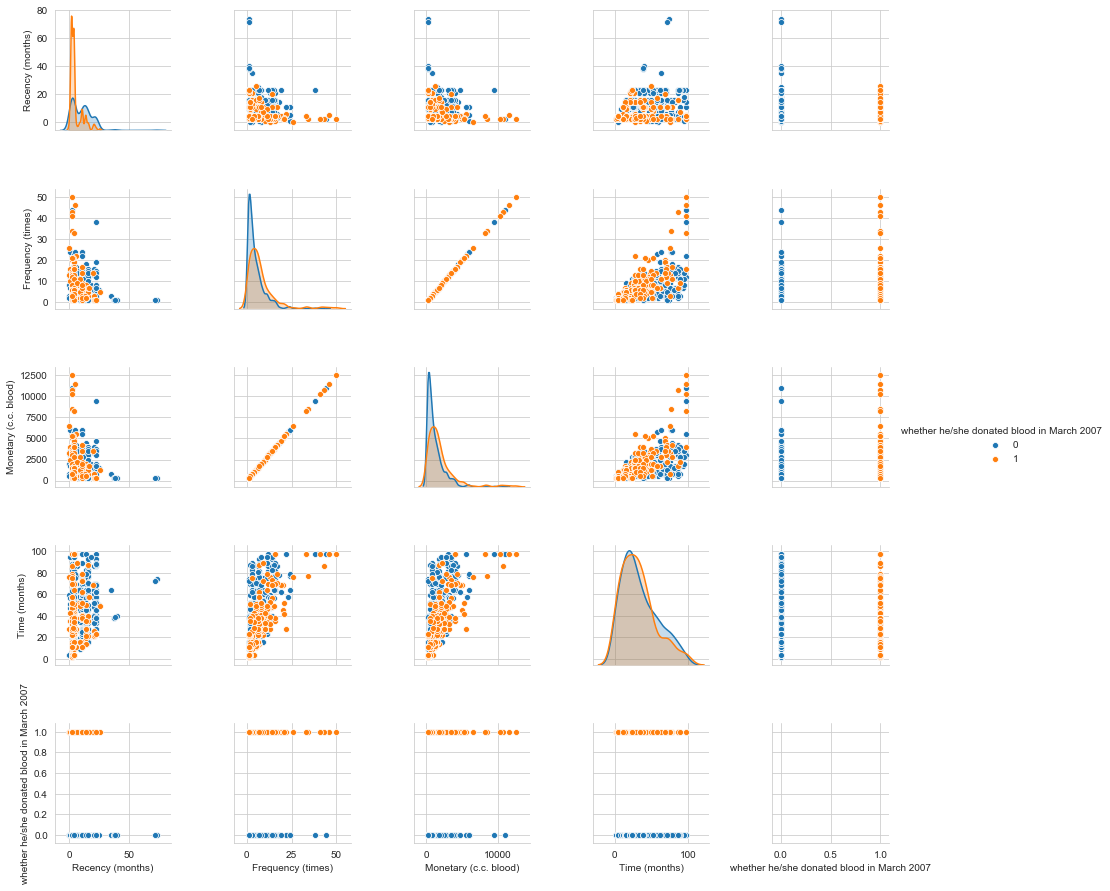

In [143]:
sns.pairplot(data=df,hue='whether he/she donated blood in March 2007')

<strong>Let's create a machine learning models that can better analyze my data and come up with predictions</strong>

Split my data to a training and a testing set

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
df.columns

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')

In [146]:
X = df[['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)','Time (months)']] ## The variables I will use to predict
y = df['whether he/she donated blood in March 2007'] ## The label I want to predict

In [147]:
##random_state so I have consistent results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=98) 

For starters let's use a simple  
<strong>logistic regression </strong>model

In [148]:
from sklearn.linear_model import LogisticRegression

In [149]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Time to make some predictions:

In [150]:
log_pred = logmodel.predict(X_test)

and evaluate our model

In [151]:
from sklearn.metrics import classification_report, confusion_matrix

In [152]:
print(confusion_matrix(y_test, log_pred), '\n\n', classification_report(y_test, log_pred))

[[171   2]
 [ 46   6]] 

              precision    recall  f1-score   support

          0       0.79      0.99      0.88       173
          1       0.75      0.12      0.20        52

avg / total       0.78      0.79      0.72       225



78% accuracy for such a simple model is very good  
  
2 Type 1 errors ( False Positive )   
46  Type 1 errors ( False Negative )  

In [153]:
y_test.value_counts()

0    173
1     52
Name: whether he/she donated blood in March 2007, dtype: int64

Time to standardize our features

In [154]:
from sklearn.preprocessing import StandardScaler

In [155]:
scaler = StandardScaler()
scaler.fit(X) 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [156]:
scaled_features = scaler.transform(X)
##scaled
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(scaled_features, y, test_size=0.3, random_state=98) 

Did the accuracy improve?

In [157]:
logmodel = LogisticRegression()
logmodel.fit(X_train_scaled,y_train)
log_pred = logmodel.predict(X_test_scaled)
print(confusion_matrix(y_test,log_pred), '\n\n', classification_report(y_test,log_pred))

[[171   2]
 [ 46   6]] 

              precision    recall  f1-score   support

          0       0.79      0.99      0.88       173
          1       0.75      0.12      0.20        52

avg / total       0.78      0.79      0.72       225



Nothing changed! Scaling of features does NOT affect Logistic Regression

Time to try a different model.  
<strong>K-Nearest Neighbours</strong>

In [158]:
from sklearn.neighbors import KNeighborsClassifier

Without the scaled features:

In [159]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [160]:
pred_1_not_scaled = knn.predict(X_test)
print(confusion_matrix(y_test,pred_1_not_scaled), '\n\n', classification_report(y_test,pred_1_not_scaled))

[[128  45]
 [ 30  22]] 

              precision    recall  f1-score   support

          0       0.81      0.74      0.77       173
          1       0.33      0.42      0.37        52

avg / total       0.70      0.67      0.68       225



With the scaled features:

In [161]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [162]:
pred_1 = knn.predict(X_test_scaled)
print(confusion_matrix(y_test,pred_1), '\n\n', classification_report(y_test,pred_1))

[[130  43]
 [ 32  20]] 

              precision    recall  f1-score   support

          0       0.80      0.75      0.78       173
          1       0.32      0.38      0.35        52

avg / total       0.69      0.67      0.68       225



Seems pretty bad, let's try with different n_neighbors=2 (still with the scaled features)

In [163]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [164]:
pred_2 = knn.predict(X_test_scaled)
print(confusion_matrix(y_test,pred_2), '\n\n', classification_report(y_test,pred_2))

[[160  13]
 [ 39  13]] 

              precision    recall  f1-score   support

          0       0.80      0.92      0.86       173
          1       0.50      0.25      0.33        52

avg / total       0.73      0.77      0.74       225



Better! But I need to find the best value for n_neighbors

In [165]:
error_rate = []

In [166]:
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,y_train)
    pred_i = knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))

([<matplotlib.axis.XTick at 0x287cac38e80>,
 <a list of 39 Text xticklabel objects>)

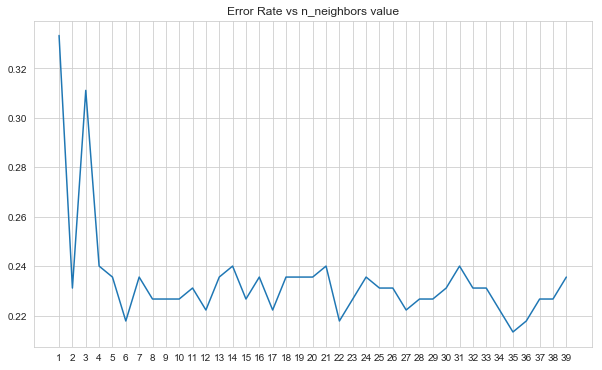

In [167]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate)
plt.title('Error Rate vs n_neighbors value')
plt.xticks(range(1,40))

From what I gather from this plot of the error/n_neighbors a very good value would be 6

In [168]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [169]:
knn_pred = knn.predict(X_test_scaled)
print(confusion_matrix(y_test,knn_pred), '\n\n', classification_report(y_test,knn_pred))

[[160  13]
 [ 36  16]] 

              precision    recall  f1-score   support

          0       0.82      0.92      0.87       173
          1       0.55      0.31      0.40        52

avg / total       0.76      0.78      0.76       225



78% > 76% accuracy

Logistic Regression has thus far performed better than KNN

Time for a 3rd Model  
<strong>Decision Trees!</strong>

In [170]:
from sklearn.tree import  DecisionTreeClassifier

In [171]:
dtree = DecisionTreeClassifier().fit(X_train,y_train)

In [172]:
dtree_pred = dtree.predict(X_test)
print(confusion_matrix(y_test,dtree_pred), '\n\n', classification_report(y_test,dtree_pred))

[[146  27]
 [ 33  19]] 

              precision    recall  f1-score   support

          0       0.82      0.84      0.83       173
          1       0.41      0.37      0.39        52

avg / total       0.72      0.73      0.73       225



scaled:

In [173]:
dtree = DecisionTreeClassifier().fit(X_train_scaled,y_train)
dtree_pred = dtree.predict(X_test_scaled)
print(confusion_matrix(y_test,dtree_pred), '\n\n', classification_report(y_test,dtree_pred))

[[146  27]
 [ 32  20]] 

              precision    recall  f1-score   support

          0       0.82      0.84      0.83       173
          1       0.43      0.38      0.40        52

avg / total       0.73      0.74      0.73       225



<strong>Random Forest</strong>

In [174]:
from sklearn.ensemble import RandomForestClassifier

In [175]:
rfc = RandomForestClassifier(n_estimators=150)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [176]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred), '\n\n', classification_report(y_test,rfc_pred))

[[150  23]
 [ 32  20]] 

              precision    recall  f1-score   support

          0       0.82      0.87      0.85       173
          1       0.47      0.38      0.42        52

avg / total       0.74      0.76      0.75       225



scaled:

In [177]:
rfc = RandomForestClassifier(n_estimators=150)
rfc.fit(X_train_scaled,y_train)
rfc_pred = rfc.predict(X_test_scaled)
print(confusion_matrix(y_test,rfc_pred), '\n\n', classification_report(y_test,rfc_pred))

[[149  24]
 [ 32  20]] 

              precision    recall  f1-score   support

          0       0.82      0.86      0.84       173
          1       0.45      0.38      0.42        52

avg / total       0.74      0.75      0.74       225



<strong>Support Vector Machines</strong>

In [178]:
from sklearn.svm import SVC
svmodel = SVC()
svmodel.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [179]:
svmodel_pred = svmodel.predict(X_test)
print(confusion_matrix(y_test,svmodel_pred), '\n\n', classification_report(y_test,svmodel_pred))

[[166   7]
 [ 49   3]] 

              precision    recall  f1-score   support

          0       0.77      0.96      0.86       173
          1       0.30      0.06      0.10        52

avg / total       0.66      0.75      0.68       225



scaled:

In [180]:
svmodel = SVC()
svmodel.fit(X_train_scaled,y_train)
svmodel_pred = svmodel.predict(X_test_scaled)
print(confusion_matrix(y_test,svmodel_pred), '\n\n', classification_report(y_test,svmodel_pred))

[[168   5]
 [ 39  13]] 

              precision    recall  f1-score   support

          0       0.81      0.97      0.88       173
          1       0.72      0.25      0.37        52

avg / total       0.79      0.80      0.77       225



Huge improvement after using the scaled features for training on the Support Vector Classifier

Let's try some Hyperparameter Tuning for more improvement

In [181]:
from sklearn.grid_search import GridSearchCV
param_grid = {'C':[0.1,1,10,100,100], 'gamma':[1,0.1,0.01,0.001,0.0001]}

In [182]:
grid = GridSearchCV(SVC(), param_grid, verbose = 3) ##verbose is for popup messages

In [183]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.760000 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.758621 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.758621 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.760000 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.758621 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.758621 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........................... C=1, gamma=1, score=0.741379 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.764368 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.760000 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.724138 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.775862 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.788571 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.775862 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.0s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [184]:
grid.best_params_

{'C': 1, 'gamma': 0.01}

In [185]:
g_pred = grid.predict(X_test)
print(confusion_matrix(y_test,g_pred), '\n\n', classification_report(y_test,g_pred))

[[156  17]
 [ 42  10]] 

              precision    recall  f1-score   support

          0       0.79      0.90      0.84       173
          1       0.37      0.19      0.25        52

avg / total       0.69      0.74      0.71       225



In [186]:
grid = GridSearchCV(SVC(), param_grid, verbose = 3) ##verbose is for popup messages
grid.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.760000 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.758621 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.758621 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.760000 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.758621 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.758621 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] C=1, gamma=0.0001 ...............................................
[CV] ...................... C=1, gamma=0.0001, score=0.758621 -   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .......................... C=10, gamma=1, score=0.771429 -   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .......................... C=10, gamma=1, score=0.793103 -   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .......................... C=10, gamma=1, score=0.810345 -   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] ........................ C=10, gamma=0.1, score=0.754286 -   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] ........................ C=10, gamma=0.1, score=0.781609 -   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] ........................ C=10, gamma=0.1, score=0.764368 -   0.0s
[CV] C

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.5s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [187]:
g_pred = grid.predict(X_test_scaled)
print(confusion_matrix(y_test,g_pred), '\n\n', classification_report(y_test,g_pred))

[[159  14]
 [ 34  18]] 

              precision    recall  f1-score   support

          0       0.82      0.92      0.87       173
          1       0.56      0.35      0.43        52

avg / total       0.76      0.79      0.77       225



Did not help all that much


The <strong>best model</strong> so far is the Support Vector Classifier with Scaled features 

In [188]:
svmodel = SVC()
svmodel.fit(X_train_scaled,y_train)
svmodel_pred = svmodel.predict(X_test_scaled)
print(confusion_matrix(y_test,svmodel_pred), '\n\n', classification_report(y_test,svmodel_pred))

[[168   5]
 [ 39  13]] 

              precision    recall  f1-score   support

          0       0.81      0.97      0.88       173
          1       0.72      0.25      0.37        52

avg / total       0.79      0.80      0.77       225



-- TESTING!  
--- 

99% SURE THIS IS COMPLETELY WRONG LEARN MORE ABOUT IT AND THEN IMPLEMENT IT

In [189]:
##Testing something ( Model stacking from video https://www.youtube.com/watch?v=8XWoBzwQ-m4)

In [192]:
X_train.shape

(523, 4)

In [193]:
y_train.shape

(523,)

In [194]:
#predict on the whole dataset
svmodel_pred = svmodel.predict(X_train_scaled)
rfc_pred = rfc.predict(X_train_scaled)

In [195]:
np.corrcoef(svmodel_pred,rfc_pred)

array([[1.        , 0.34639178],
       [0.34639178, 1.        ]])

In [196]:
svmodel_pred.shape

(523,)

In [197]:
y_train.ravel().shape

(523,)

In [198]:
## The correlation is small enough to try model stacking

In [199]:
d = { 'SVM predictions': svmodel_pred ,'Random Forest Predictions': rfc_pred ,'Labels': y_train.ravel() }
df2 = pd.DataFrame(data = d)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 3 columns):
SVM predictions              523 non-null int64
Random Forest Predictions    523 non-null int64
Labels                       523 non-null int64
dtypes: int64(3)
memory usage: 12.3 KB


In [204]:
df2[(df2['SVM predictions'] == 1) & (df2['Random Forest Predictions'] == 1)].count()

SVM predictions              26
Random Forest Predictions    26
Labels                       26
dtype: int64

In [205]:
df2.head()

,SVM predictions,Random Forest Predictions,Labels
0,0,1,1
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [206]:
X = df2[['SVM predictions', 'Random Forest Predictions']] ## The variables I will use to predict
y = df2['Labels'] ## The label I want to predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=98) 

In [207]:
new_log = LogisticRegression().fit(X_train,y_train)

In [208]:
new_log_pred = new_log.predict(X_test)

In [209]:
print(confusion_matrix(y_test,new_log_pred), '\n\n', classification_report(y_test,new_log_pred))

[[119   0]
 [  9  29]] 

              precision    recall  f1-score   support

          0       0.93      1.00      0.96       119
          1       1.00      0.76      0.87        38

avg / total       0.95      0.94      0.94       157

